#### 이항검정

In [2]:
N = 10
mu_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

7

In [4]:
sp.stats.binom_test(n, N)

0.3437499999999999

In [8]:
N = 100
mu_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

49

In [9]:
sp.stats.binom_test(n, N)

0.9204107626128206

In [10]:
N = 100
mu_0 = 0.35
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

31

In [11]:
sp.stats.binom_test(n, N)

0.00018314322488235352

#### Ex. 9.5.1

In [40]:
N = 10
for n in range(N + 1):
    x = sp.stats.binom_test(n, N)
    if x < 0.1:
        print(n, end=', ')

0, 1, 9, 10, 

In [60]:
N1 = 10
pvalues1 = np.array([sp.stats.binom_test(n, N1) for n in range(N1 + 1)])
fair_range1 = np.where(pvalues1 > 0.1)
fair_start1, fair_end1 = fair_range1[0], fair_range1[-1]
print("N={}일 때 공정한 경우: 앞면이 나온 횟수가 {}~{}일 때".format(N1, fair_start1[0], fair_end1[-1]))

N2 = 1000
pvalues2 = np.array([sp.stats.binom_test(n, N2) for n in range(N2 + 1)])
fair_range2 = np.where(pvalues2 > 0.1)
fair_start2, fair_end2 = fair_range2[0], fair_range2[-1]
print("N={}일 때 공정한 경우: 앞면이 나온 횟수가 {}~{}일 때".format(N2, fair_start2[0], fair_end2[-1]))

N=10일 때 공정한 경우: 앞면이 나온 횟수가 2~8일 때
N=1000일 때 공정한 경우: 앞면이 나온 횟수가 474~526일 때


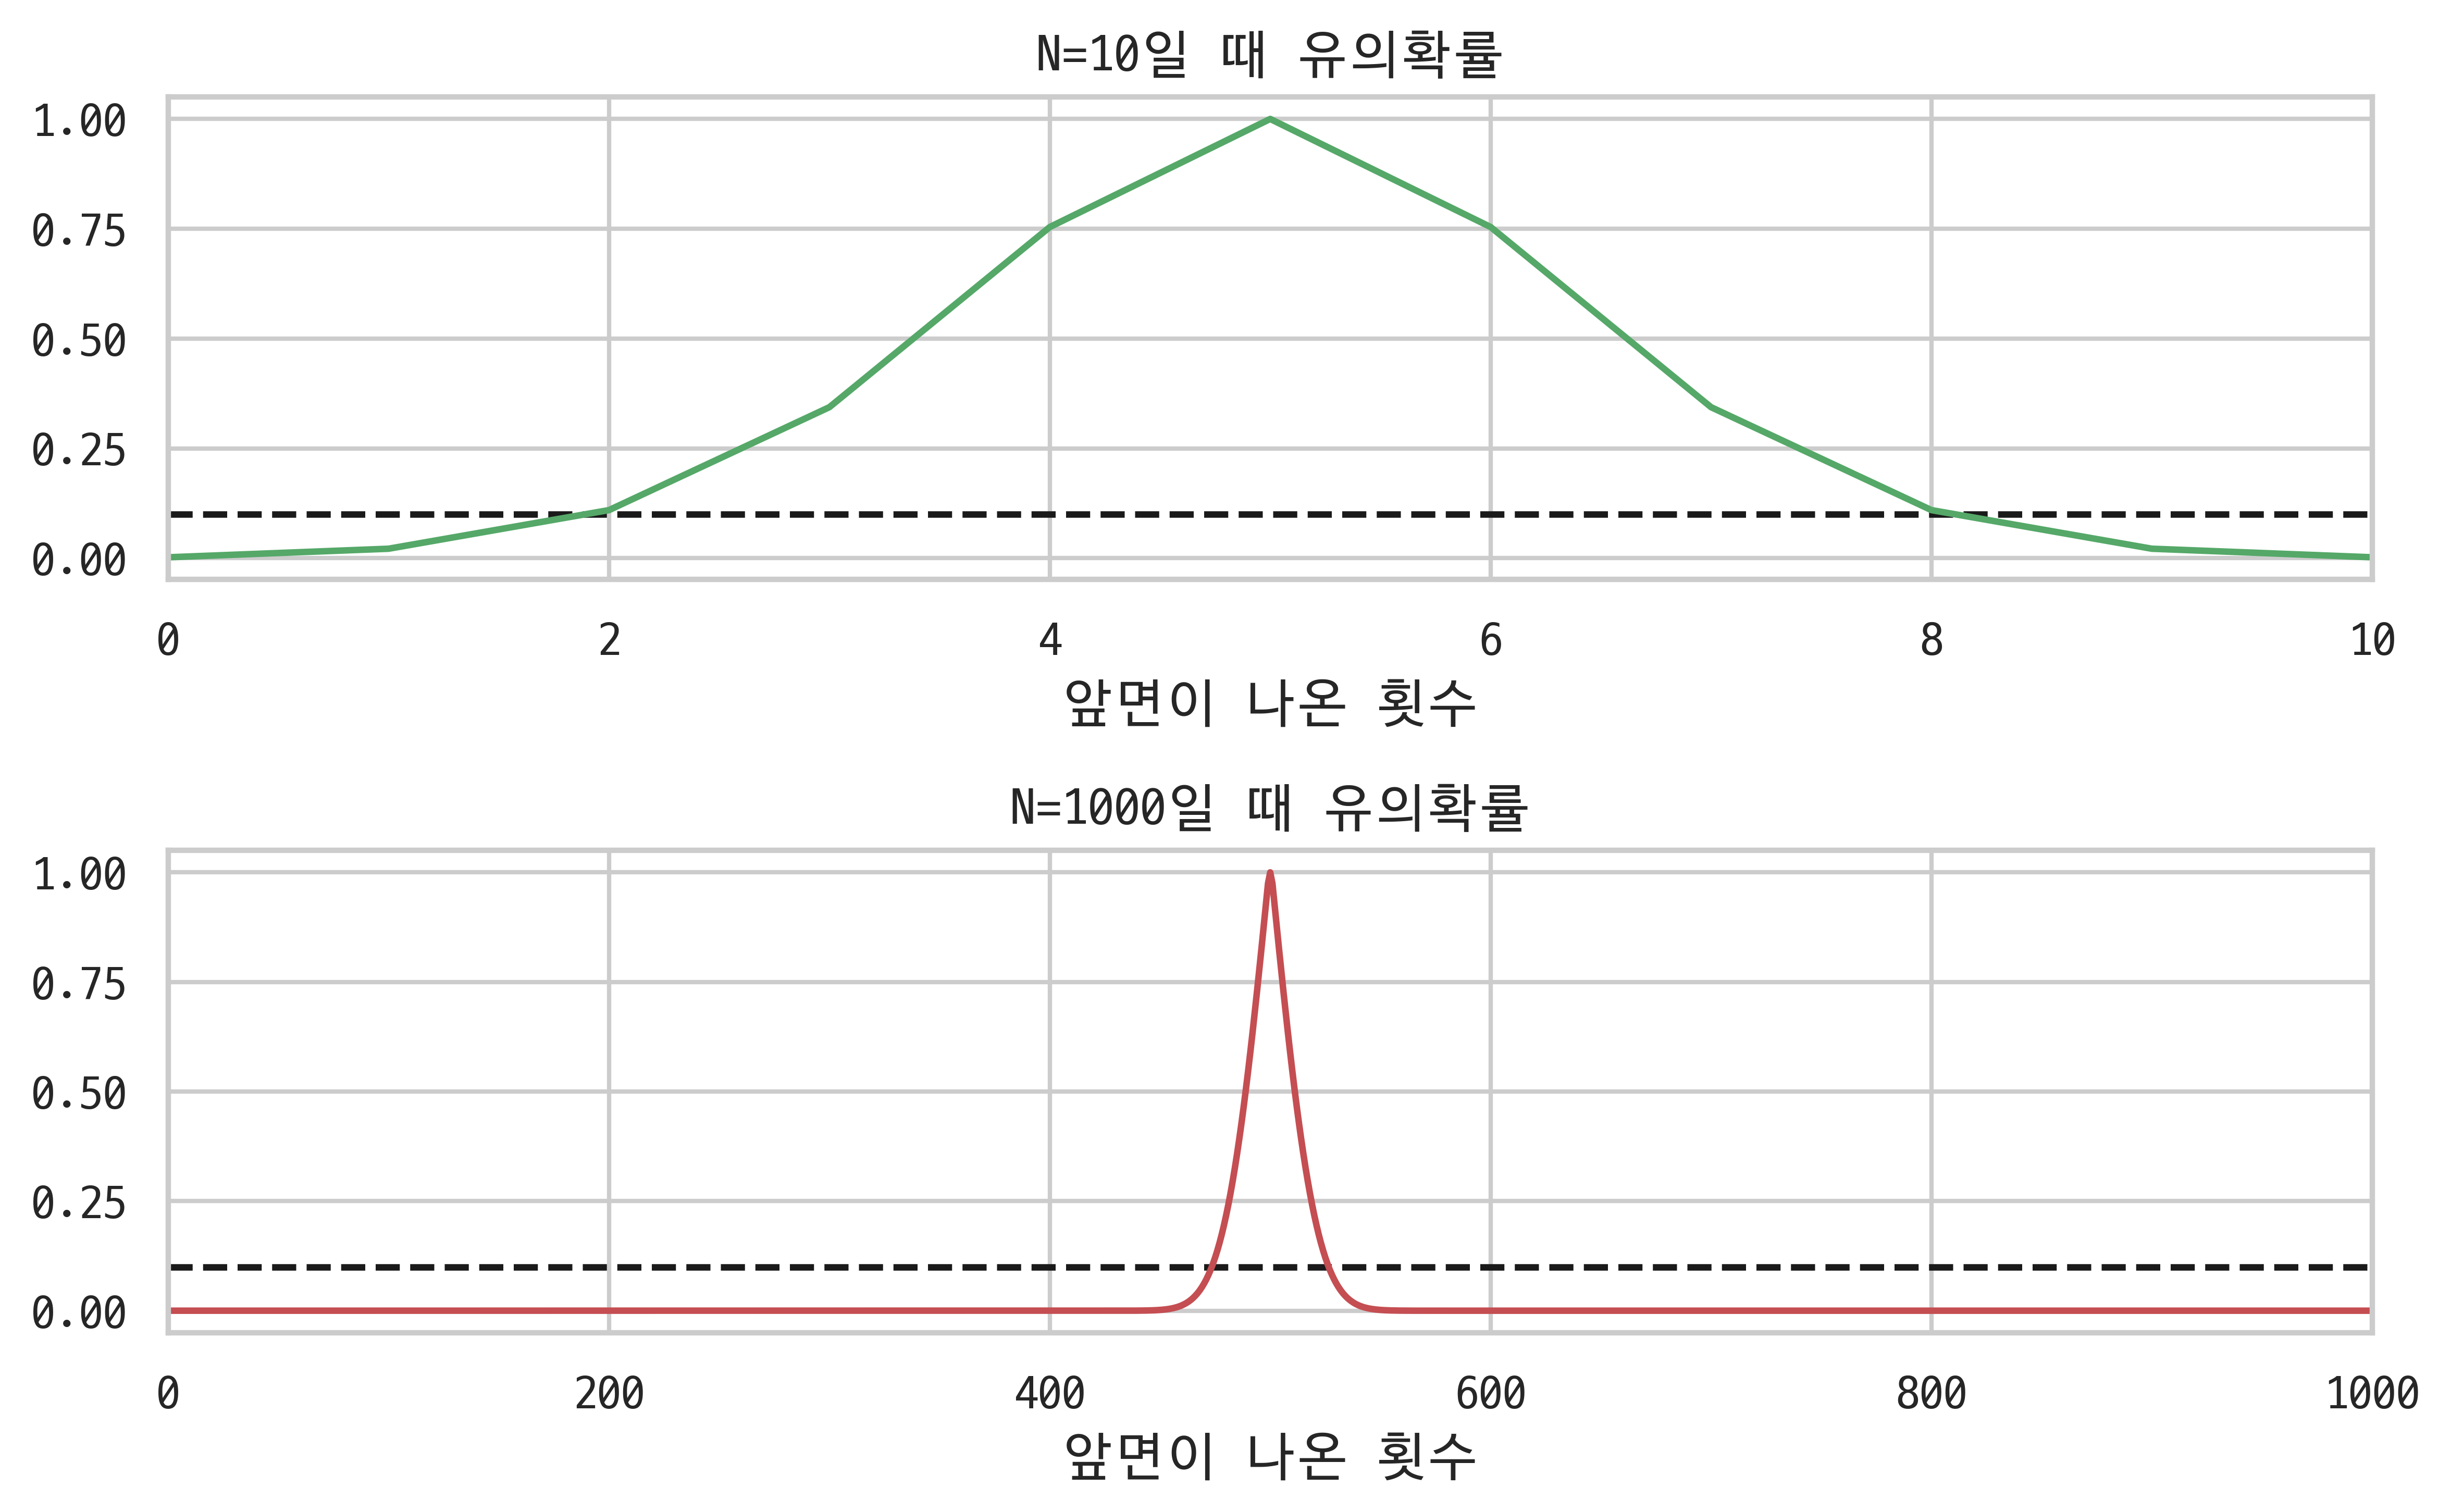

In [59]:
plt.subplot(211)
plt.plot(pvalues1, 'g-')
plt.hlines(y=0.1, xmin=0, xmax=N1 + 1, ls='--')
plt.xlim(0, N1)
plt.xlabel("앞면이 나온 횟수")
plt.title("N={}일 때 유의확률".format(N1))

plt.subplot(212)
plt.plot(pvalues2, 'r-')
plt.hlines(y=0.1, xmin=0, xmax=N2 + 1, ls='--')
plt.xlim(0, N2)
plt.xlabel("앞면이 나온 횟수")
plt.title("N={}일 때 유의확률".format(N2))

plt.tight_layout()
plt.show()


#### Ex. 9.5.2

In [61]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [62]:
tips[tips.sex == 'Female'].smoker.value_counts()

No     54
Yes    33
Name: smoker, dtype: int64

In [63]:
sp.stats.binom_test(54, 54+33, alternative='greater')

0.015709055116923068

In [64]:
tips[(tips.sex == 'Female') & (tips.time == 'Dinner')].smoker.value_counts()

No     29
Yes    23
Name: smoker, dtype: int64

In [65]:
sp.stats.binom_test(29, 29+23, alternative='greater')

0.2442278346899461

#### Ex. 9.5.3

In [54]:
for N in range(1000, 1101):
    pvalues = np.array([sp.stats.binom_test(n, N, p=2/3, alternative='greater') for n in range(N + 1)])
    fair_range = np.where(pvalues > 0.01)
    fair_start, fair_end = fair_range[0], fair_range[-1]
    if (0.7 * N) > fair_range[-1].all():
        print("N={}일 때 공정한 경우: 앞면이 나온 횟수가 {}~{}일 때".format(N, fair_start[0], fair_end[-1]))

N=1000일 때 공정한 경우: 앞면이 나온 횟수가 0~701일 때
N=1001일 때 공정한 경우: 앞면이 나온 횟수가 0~702일 때
N=1002일 때 공정한 경우: 앞면이 나온 횟수가 0~702일 때
N=1003일 때 공정한 경우: 앞면이 나온 횟수가 0~703일 때
N=1004일 때 공정한 경우: 앞면이 나온 횟수가 0~704일 때
N=1005일 때 공정한 경우: 앞면이 나온 횟수가 0~705일 때
N=1006일 때 공정한 경우: 앞면이 나온 횟수가 0~705일 때
N=1007일 때 공정한 경우: 앞면이 나온 횟수가 0~706일 때
N=1008일 때 공정한 경우: 앞면이 나온 횟수가 0~707일 때
N=1009일 때 공정한 경우: 앞면이 나온 횟수가 0~707일 때
N=1010일 때 공정한 경우: 앞면이 나온 횟수가 0~708일 때
N=1011일 때 공정한 경우: 앞면이 나온 횟수가 0~709일 때
N=1012일 때 공정한 경우: 앞면이 나온 횟수가 0~709일 때
N=1013일 때 공정한 경우: 앞면이 나온 횟수가 0~710일 때
N=1014일 때 공정한 경우: 앞면이 나온 횟수가 0~711일 때
N=1015일 때 공정한 경우: 앞면이 나온 횟수가 0~711일 때
N=1016일 때 공정한 경우: 앞면이 나온 횟수가 0~712일 때
N=1017일 때 공정한 경우: 앞면이 나온 횟수가 0~713일 때
N=1018일 때 공정한 경우: 앞면이 나온 횟수가 0~713일 때
N=1019일 때 공정한 경우: 앞면이 나온 횟수가 0~714일 때
N=1020일 때 공정한 경우: 앞면이 나온 횟수가 0~715일 때
N=1021일 때 공정한 경우: 앞면이 나온 횟수가 0~715일 때
N=1022일 때 공정한 경우: 앞면이 나온 횟수가 0~716일 때
N=1023일 때 공정한 경우: 앞면이 나온 횟수가 0~717일 때
N=1024일 때 공정한 경우: 앞면이 나온 횟수가 0~717일 때
N=1025일 때 공정한 경우: 앞면이 나온 횟수가 0~718일 때
N=1026일 때 공정

KeyboardInterrupt: 

In [47]:
sp.stats.binom_test(769, 1100, p=2/3, alternative='greater'), sp.stats.binom_test(770, 1100, p=2/3, alternative='greater')

(0.011763627357738449, 0.009906572889331824)

Text(0.5, 1.0, 'N=1100일 때 유의확률')

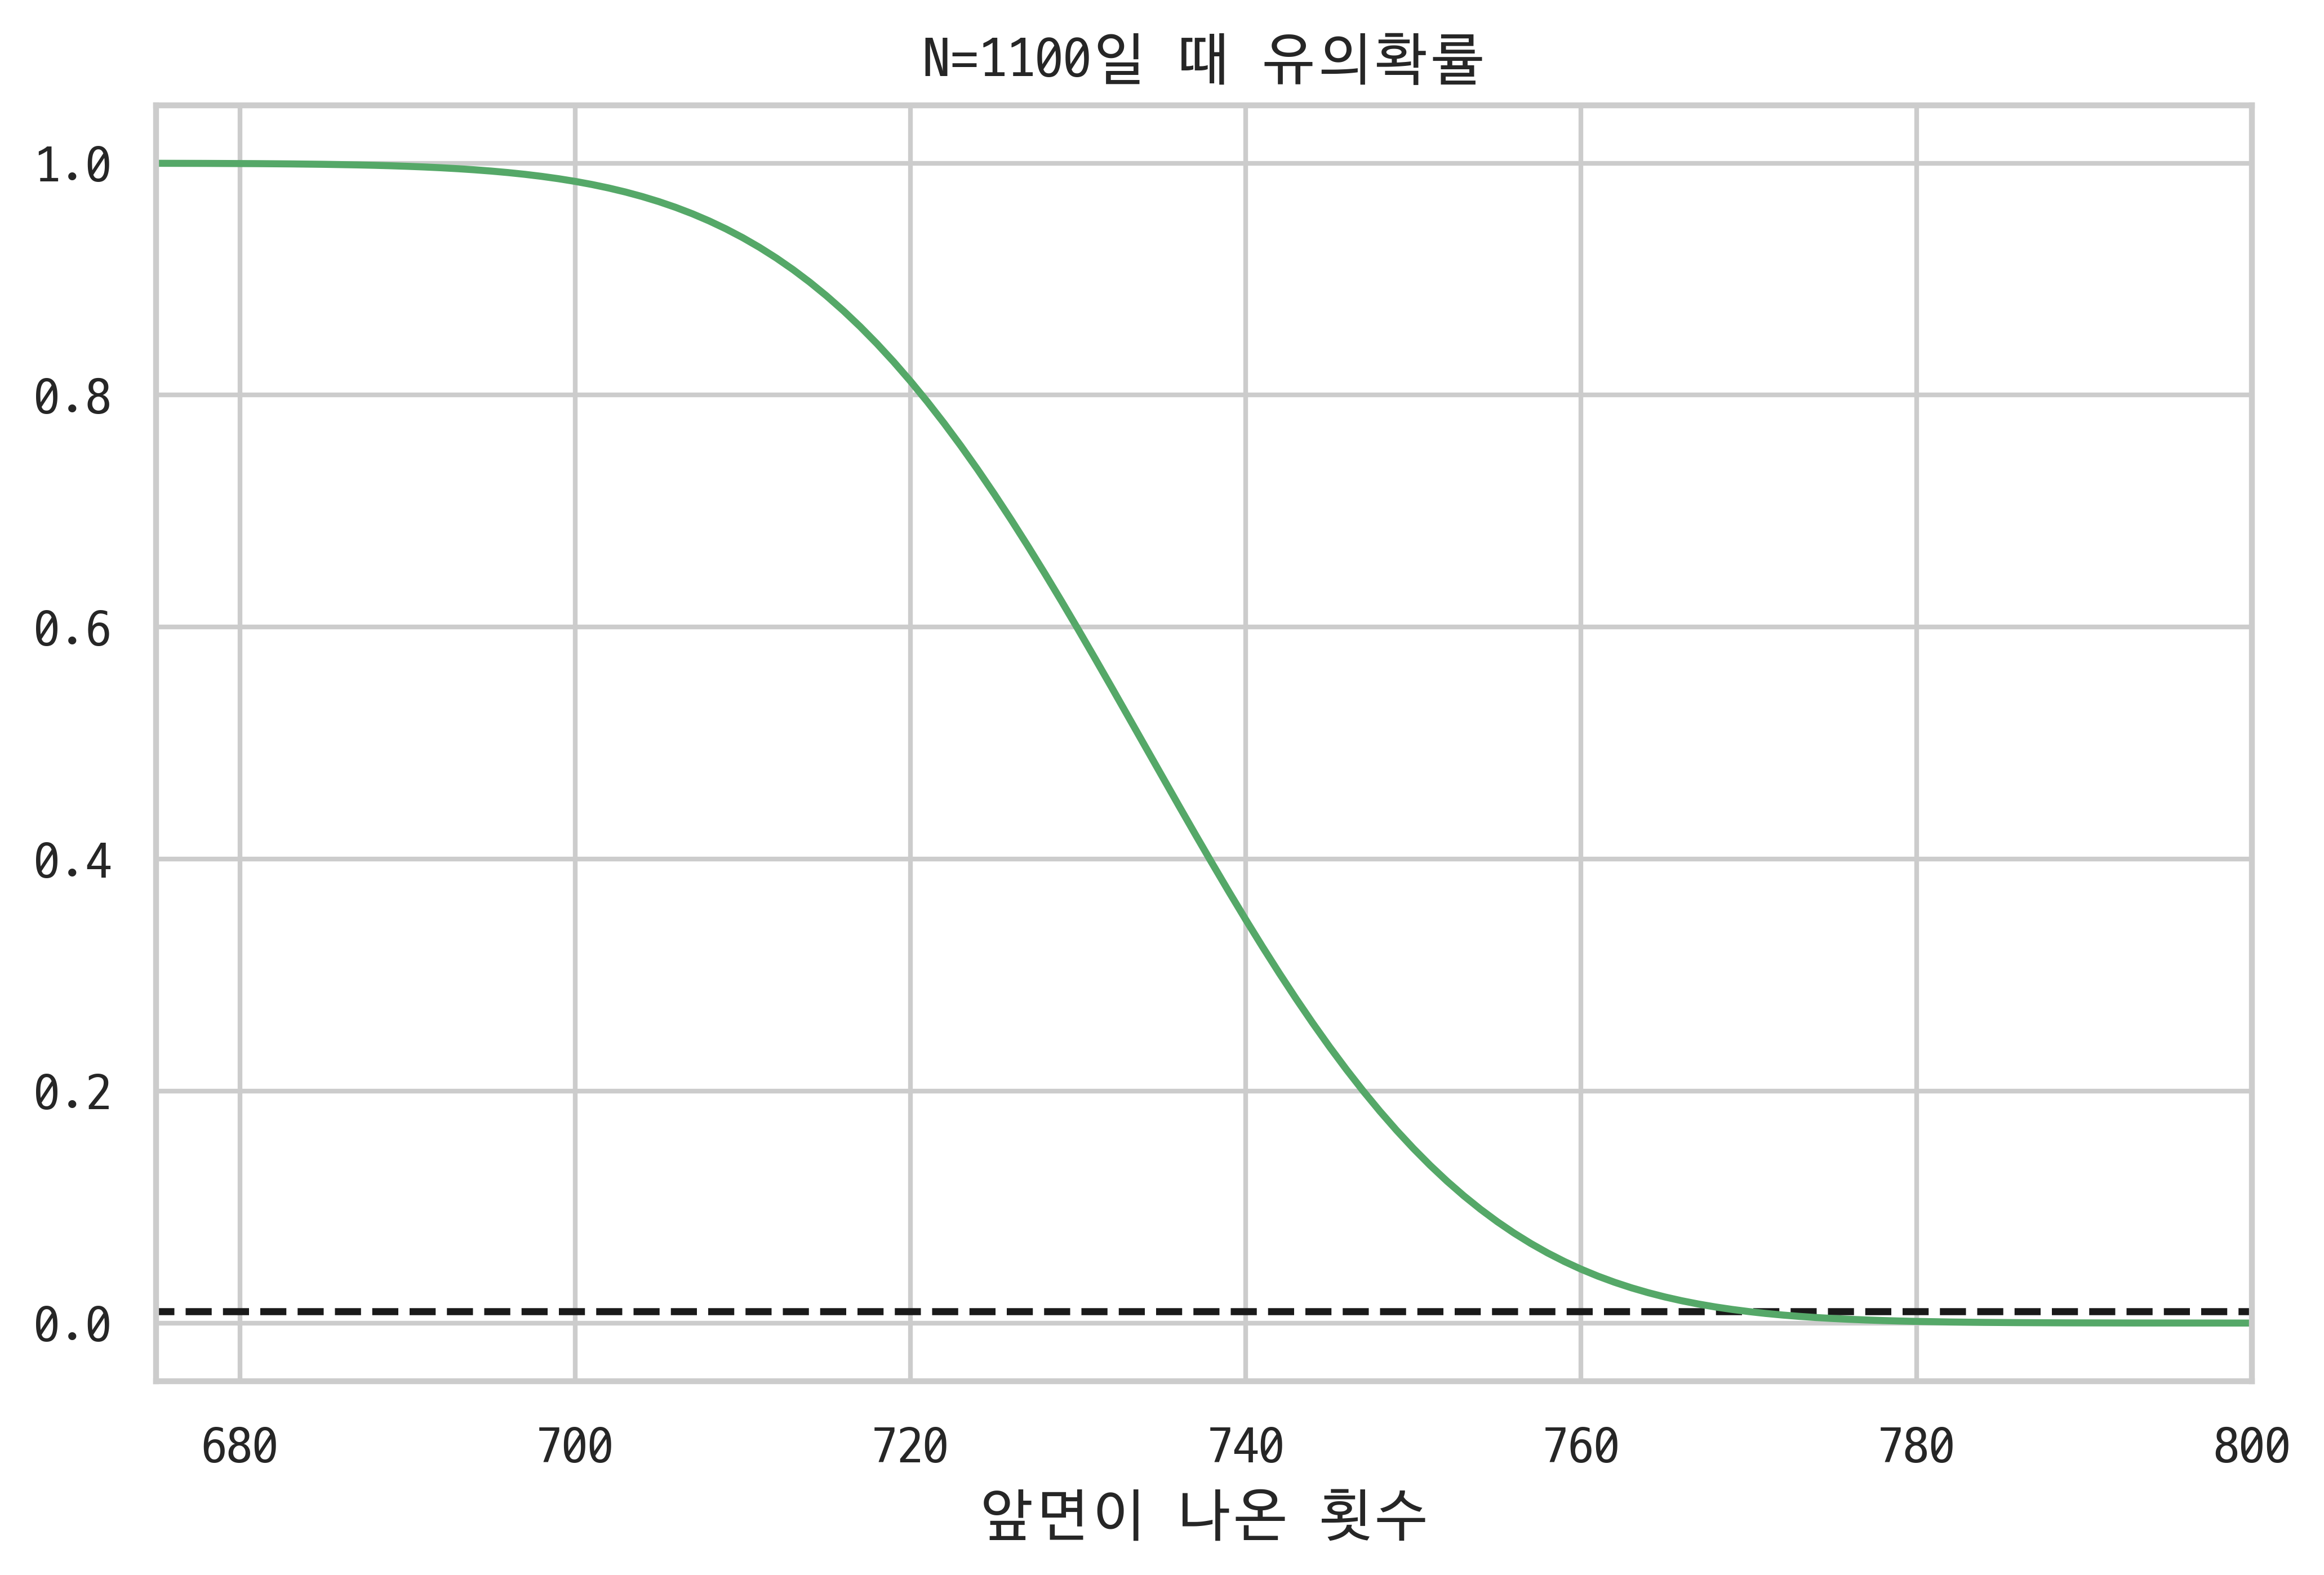

In [49]:
plt.plot(pvalues, 'g-')
plt.hlines(y=0.01, xmin=0, xmax=N + 1, ls='--')
plt.xlim(675, 800)
plt.xlabel("앞면이 나온 횟수")
plt.title("N={}일 때 유의확률".format(N))

#### 카이제곱검정

In [55]:
N = 10
K = 4
mu_0 = np.ones(K)/K
np.random.seed(0)
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([0, 3, 5, 2], dtype=int64)

In [58]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=5.199999999999999, pvalue=0.157724450396663)

In [59]:
N = 100
K = 4
mu_0 = np.array([0.35, 0.30, 0.20, 0.15])
np.random.seed(0)
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([37, 32, 20, 11], dtype=int64)

In [60]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=16.56, pvalue=0.0008703471978912127)

#### Ex. 9.5.4

In [62]:
sp.stats.chisquare([0, 0, 0, 0, 0, 5])

Power_divergenceResult(statistic=25.000000000000004, pvalue=0.00013933379118562602)

#### 카이제곱 독립검정

In [1]:
obs = np.array([[5, 15], [10, 20]])
sp.stats.chi2_contingency(obs)

(0.0992063492063492,
 0.7527841326498471,
 1,
 array([[ 6., 14.],
        [ 9., 21.]]))

In [3]:
obs = np.array([[4, 16, 20], [23, 18, 19]])
result = sp.stats.chi2_contingency(obs)
print(result[1])

0.00704786570249751


#### 단일표본 z검정

In [4]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [5]:
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x.mean() - mu) / np.sqrt(sigma2 / len(x))
    return z, 2 * sp.stats.norm().sf(np.abs(z))

ztest_1samp(x)

(2.3338341854824276, 0.019604406021683538)

In [6]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
ztest_1samp(x)

(0.5980801553448499, 0.5497864508624168)

#### 단일표본 t검정

In [7]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=2.28943967238967, pvalue=0.04781846490857058)

In [8]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=0.5904283402851698, pvalue=0.5562489158694675)

#### 독립표본 t검정

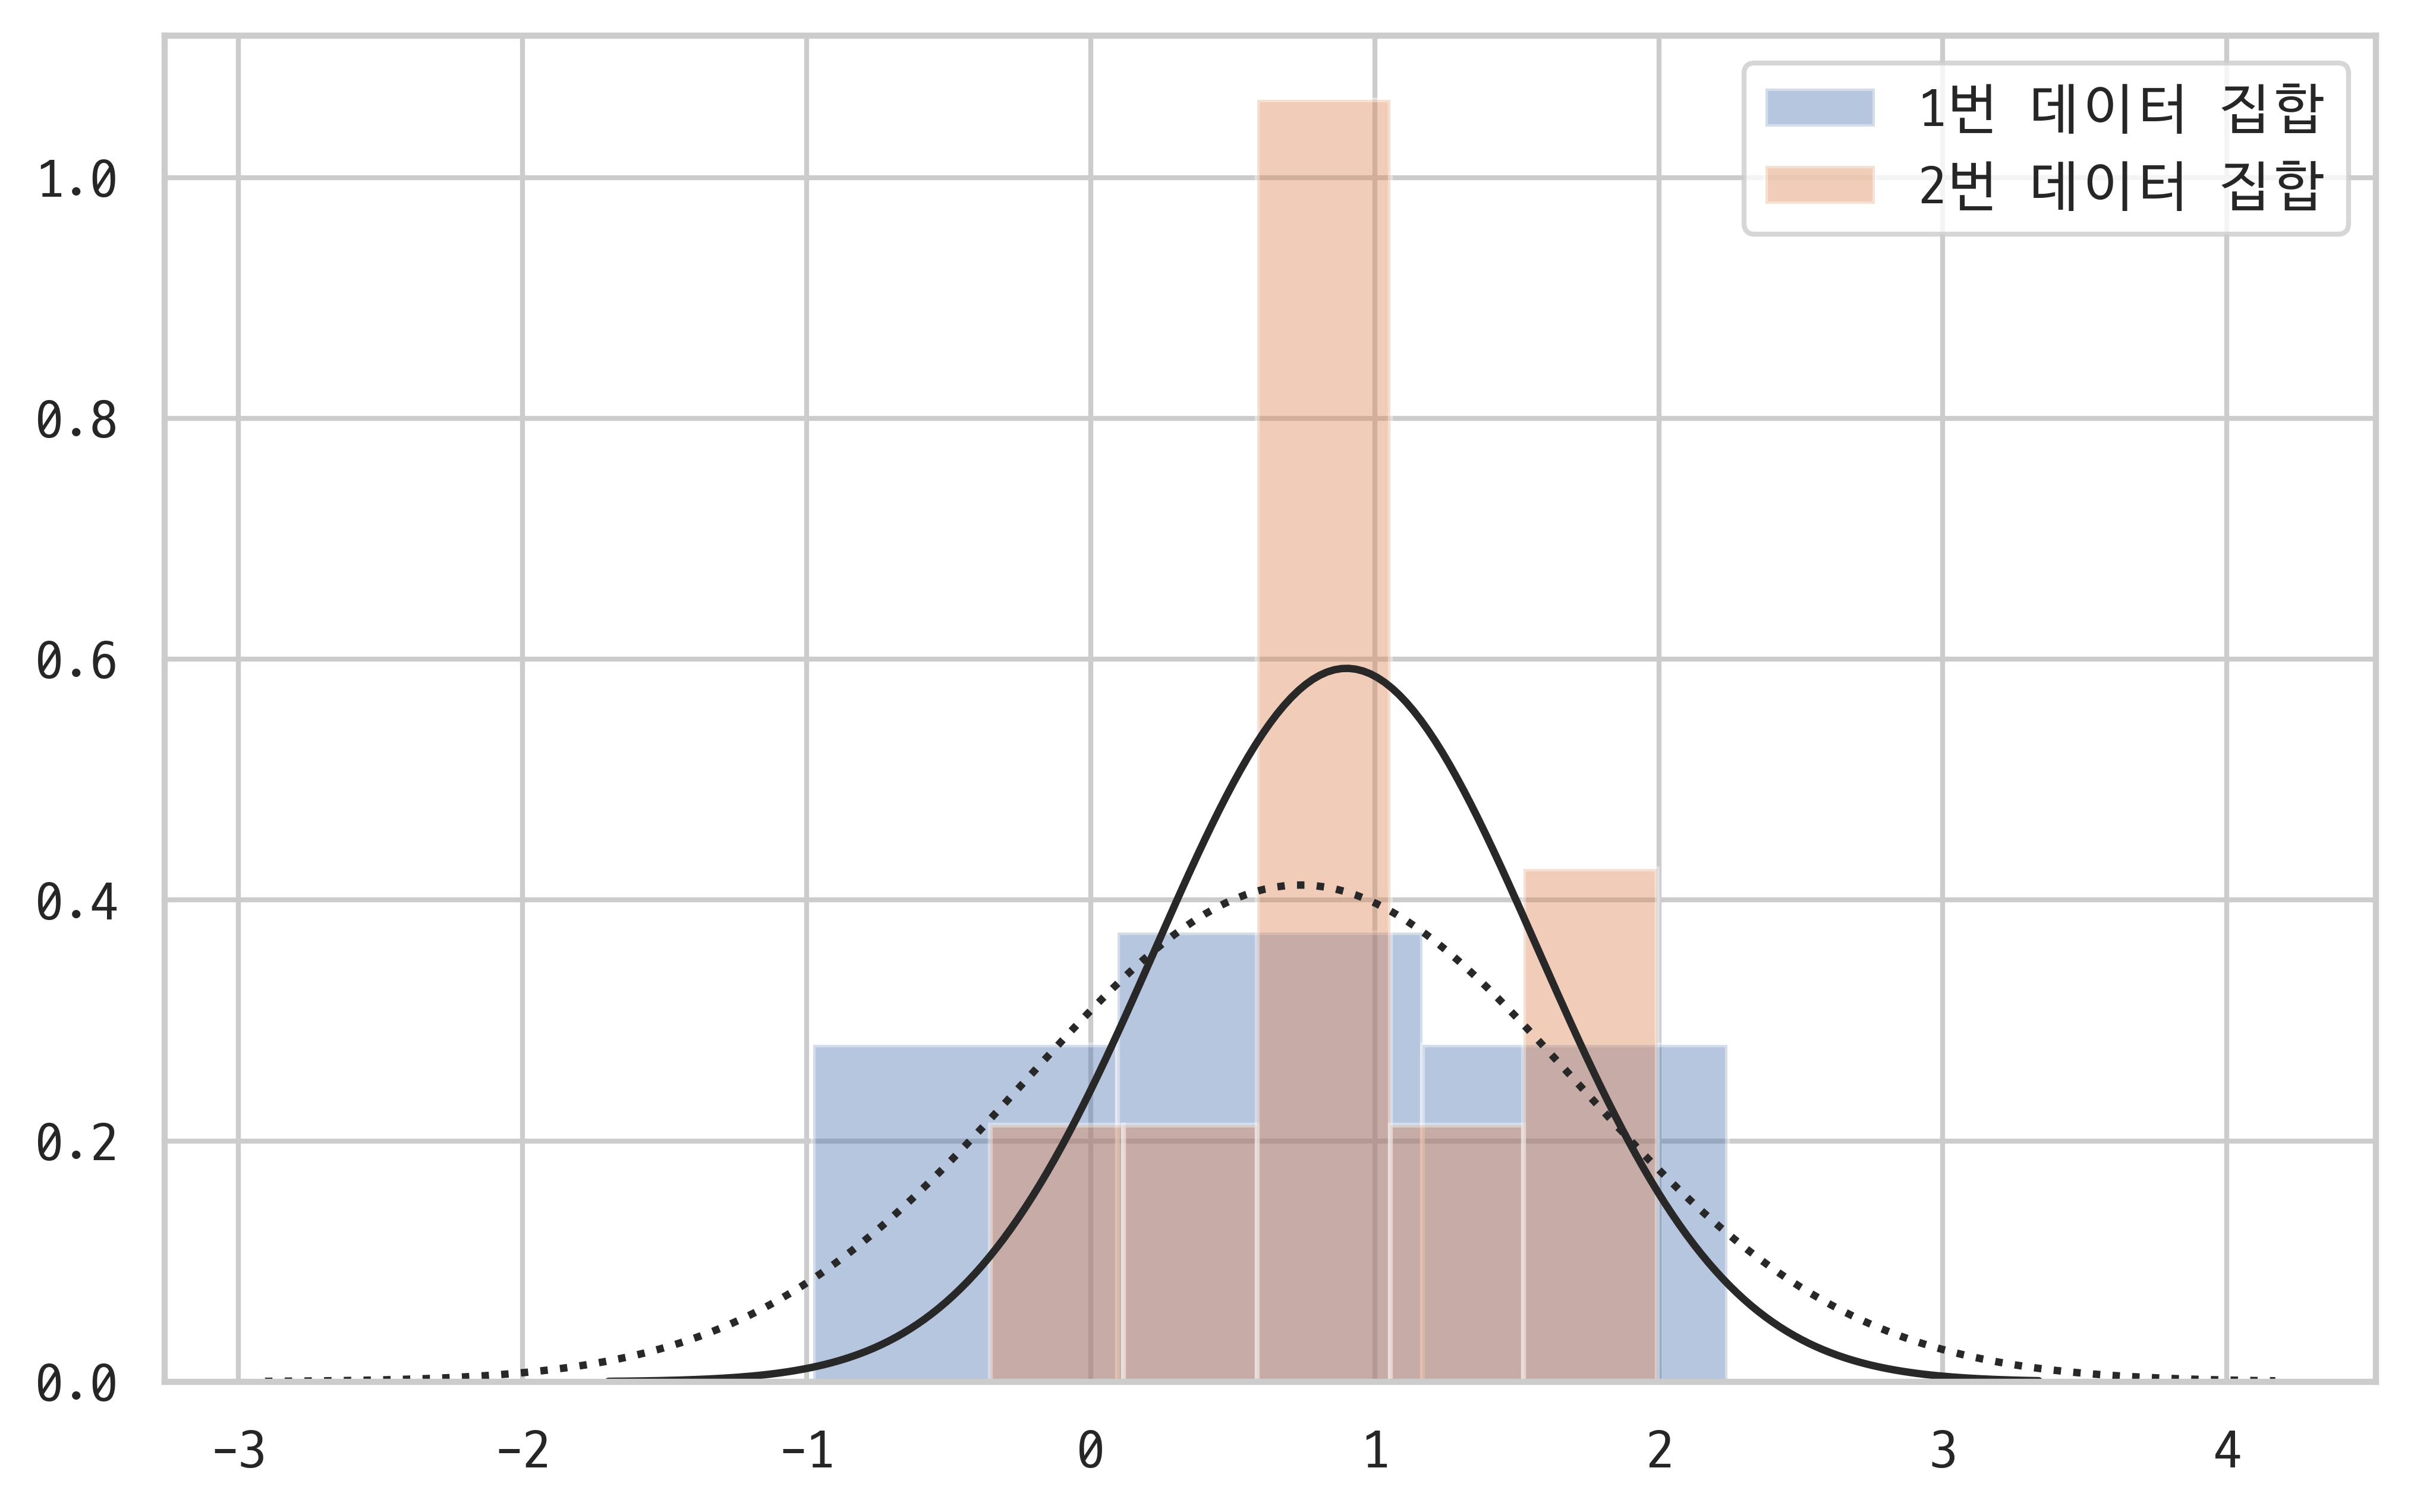

In [9]:
N_1 = 10
mu_1 = 0
sigma_1 = 1
N_2 = 10
mu_2 = 0.5
sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

In [10]:
np.mean(x1), np.mean(x2)

(0.7380231707288347, 0.9006460151624349)

In [11]:
sp.stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=-0.4139968526988655, pvalue=0.6843504889824326)

In [13]:
N_1 = 50
mu_1 = 0
sigma_1 = 1
N_2 = 100
mu_2 = 0.5
sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
sp.stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=-2.6826951236616963, pvalue=0.008133970915722658)

#### Ex.9.5.6

In [19]:
x1 = np.array([80, 75, 85, 50, 60, 75, 45, 70, 90, 95, 85, 80])
x2 = np.array([80, 85, 70, 80, 35, 55, 80])
sp.stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=0.596519621317167, pvalue=0.562790180213766)

In [20]:
sp.stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=0.623010926550264, pvalue=0.5415458608473267)

#### 대응표본 t검정

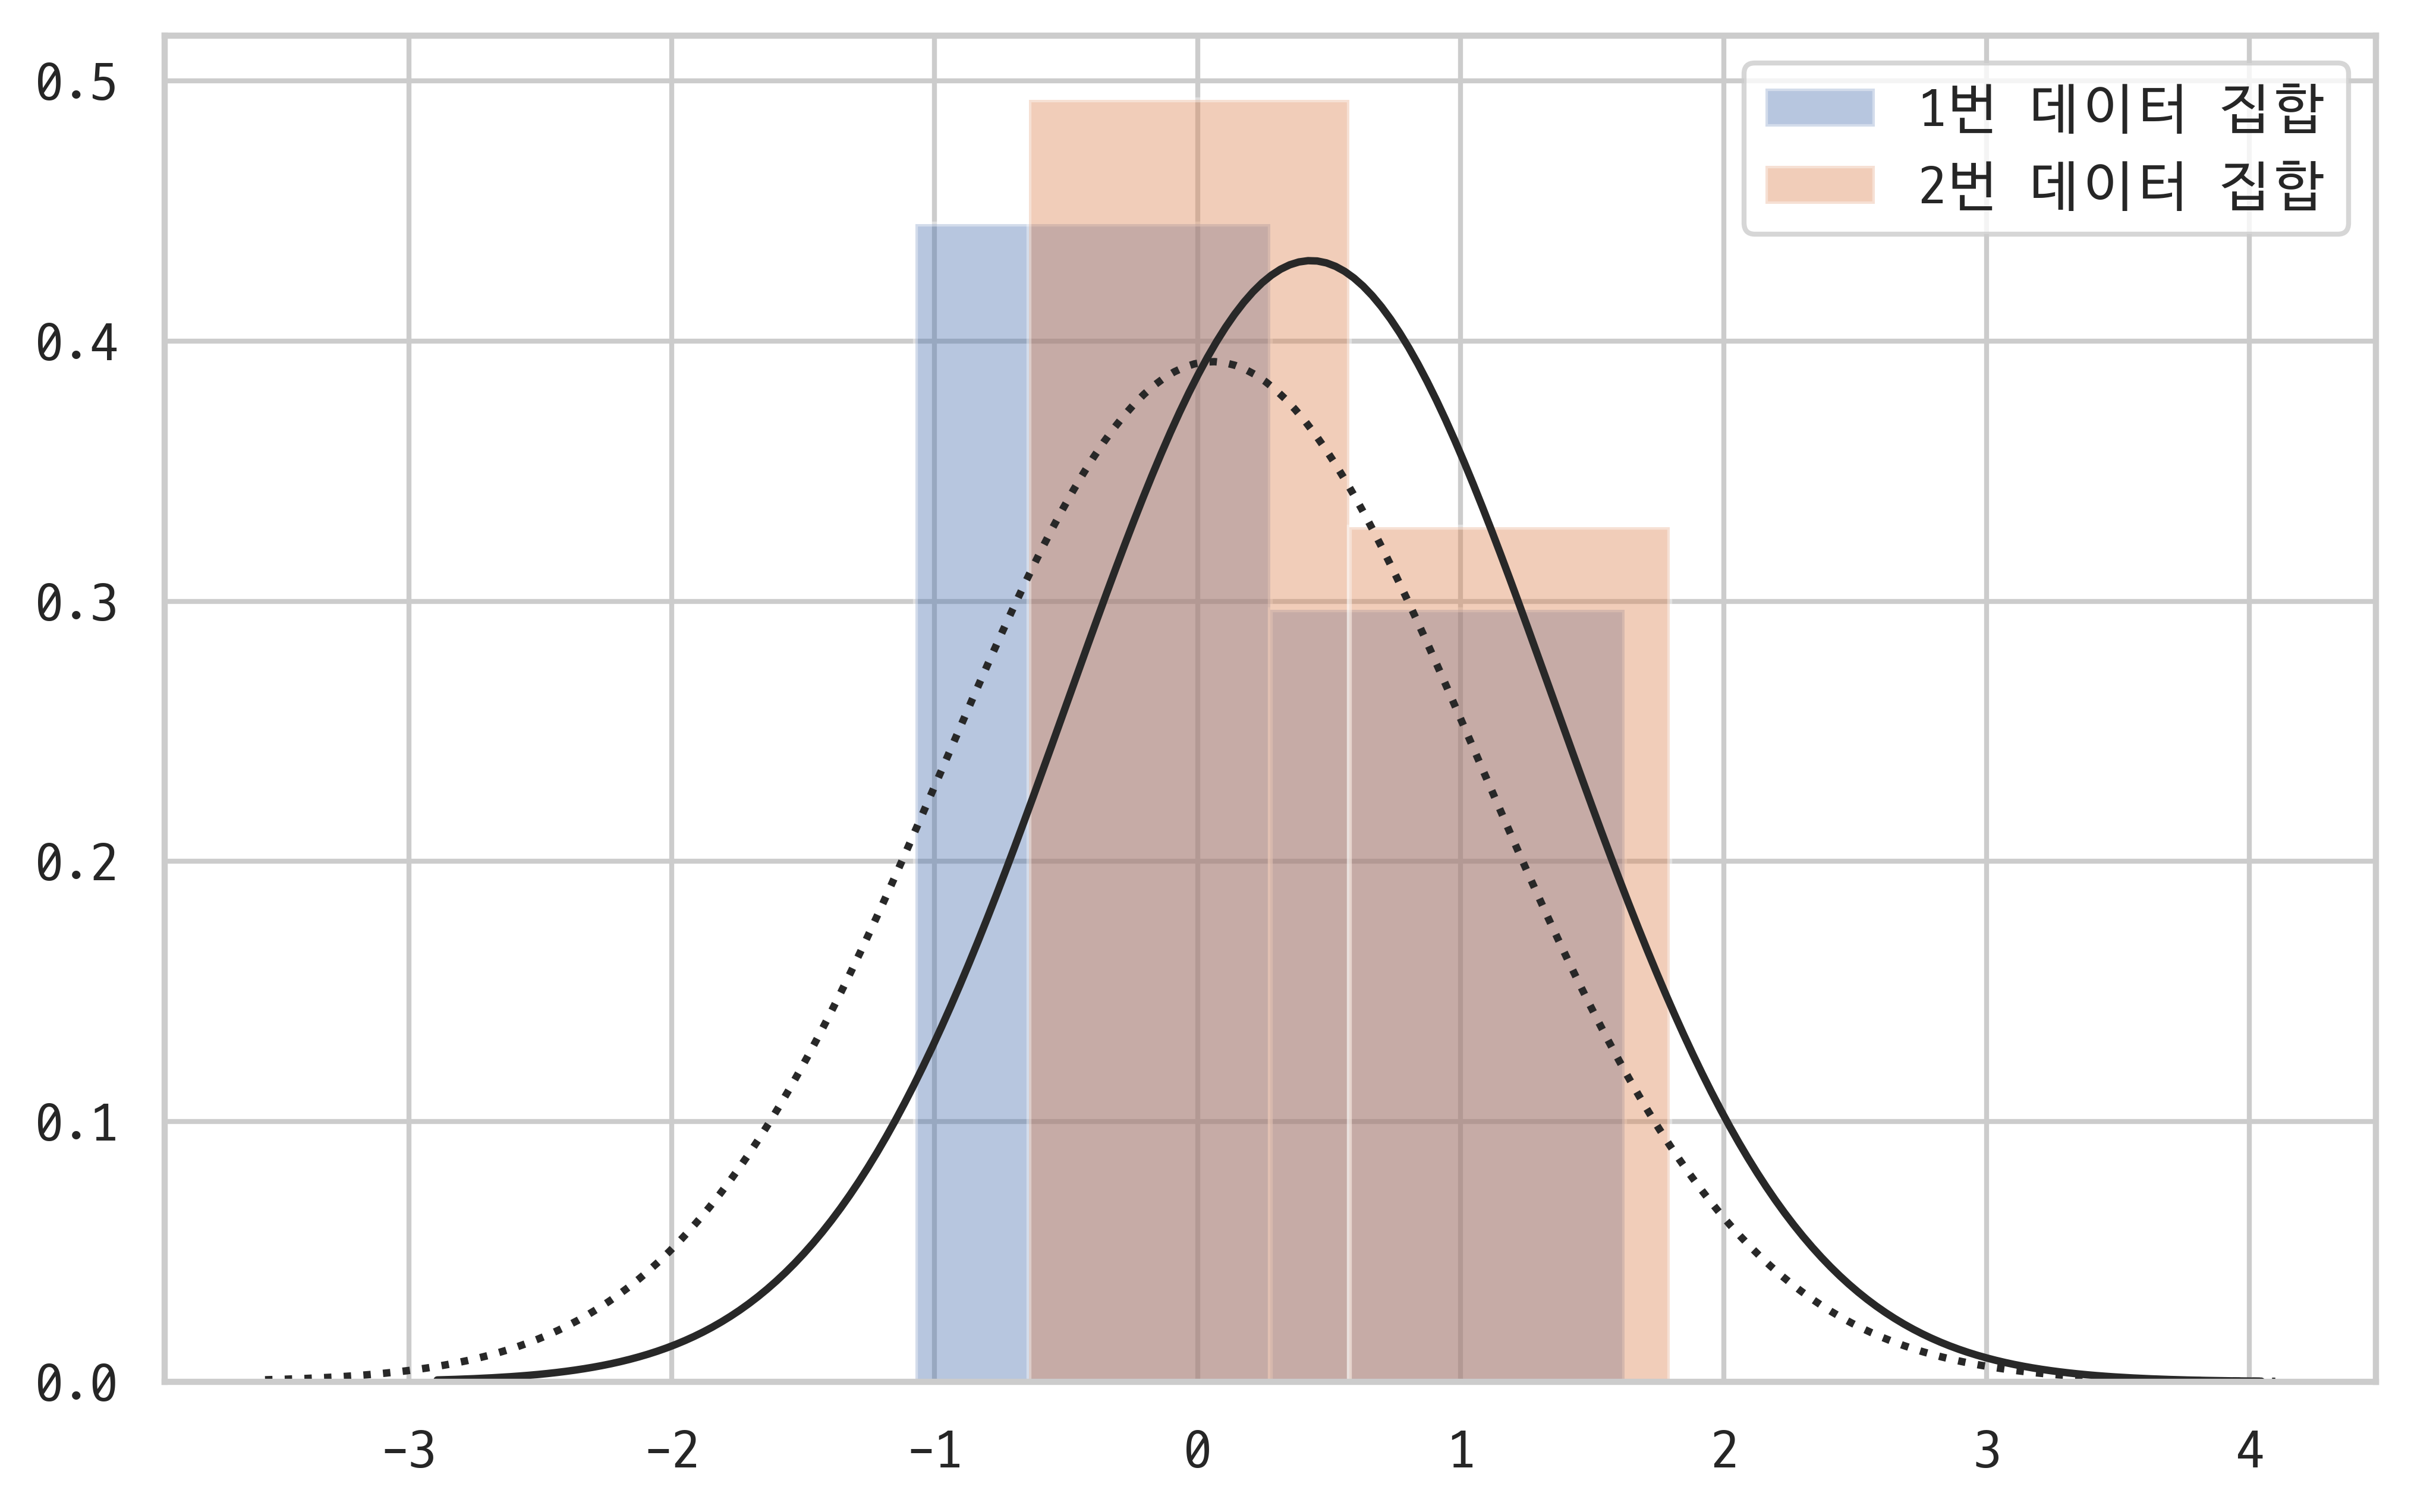

In [21]:
N = 5
mu_1 = 0
mu_2 = 0.4
np.random.seed(1)
x1 = sp.stats.norm(mu_1).rvs(N)
x2 = x1 + sp.stats.norm(mu_2, 0.1).rvs(N)

ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

In [22]:
sp.stats.ttest_rel(x1, x2)

Ttest_relResult(statistic=-5.662482449248929, pvalue=0.0047953456833781305)

#### 등분산검정

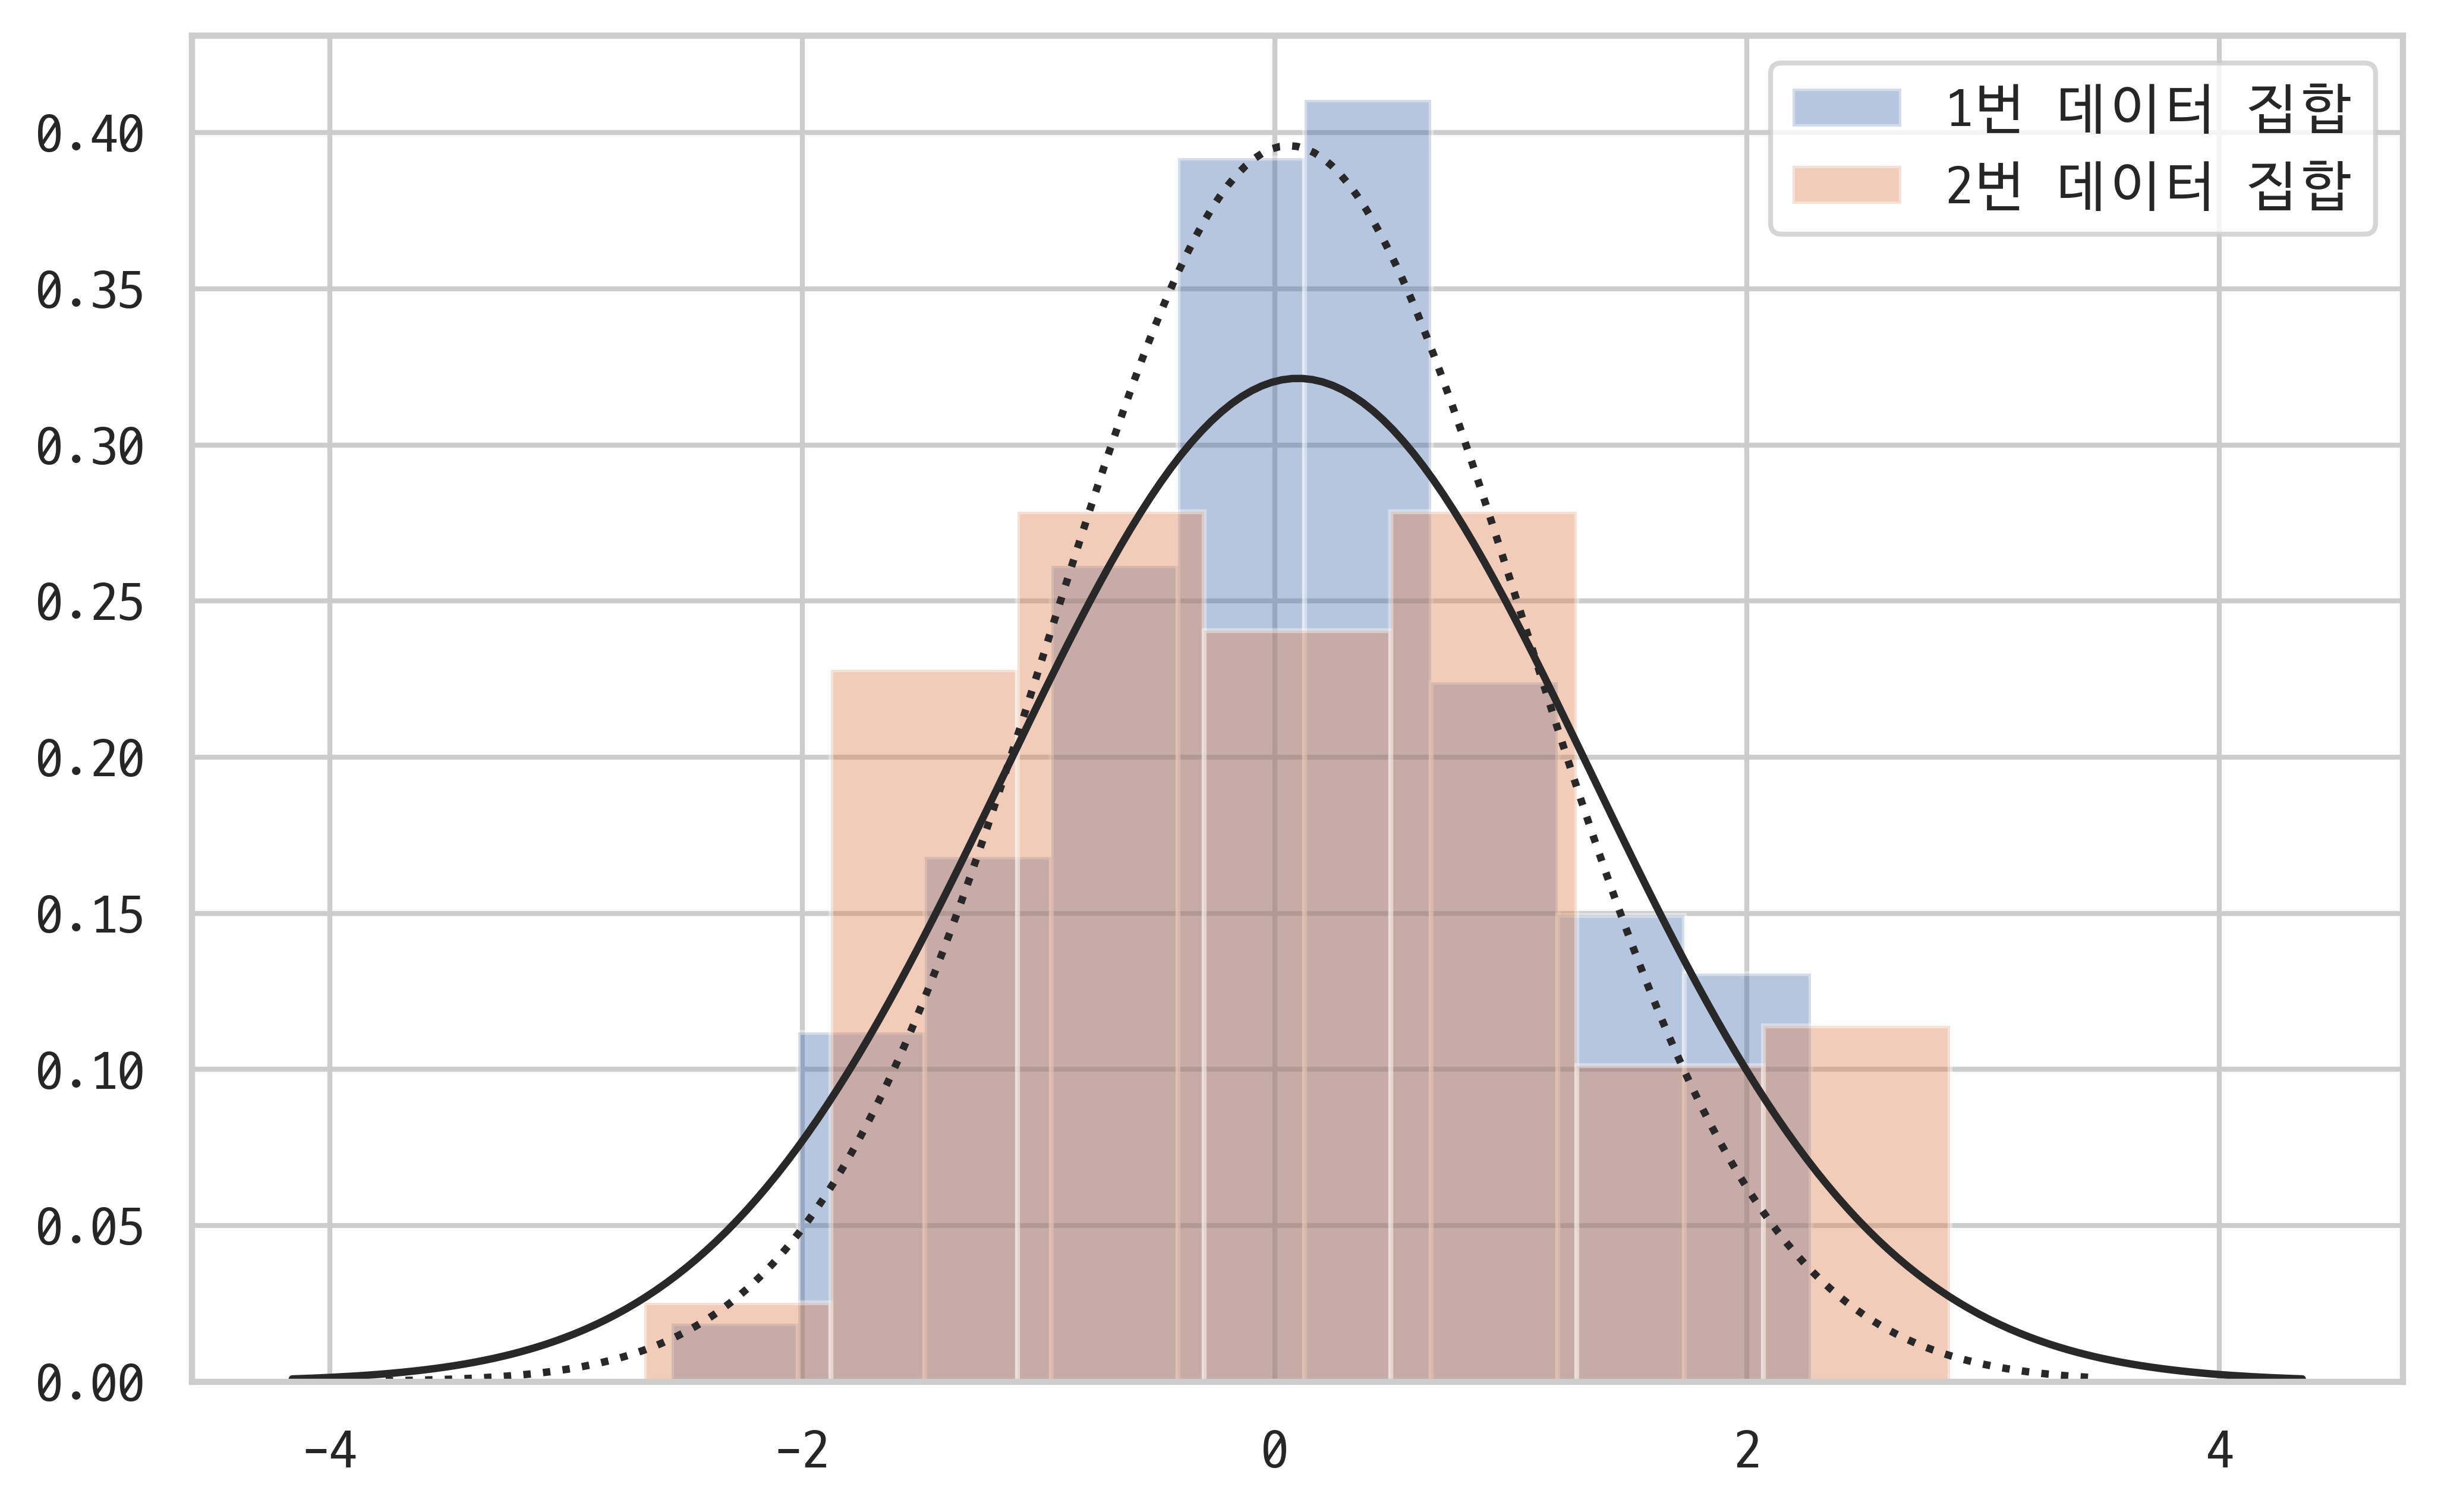

In [23]:
N_1 = 100
N_2 = 100
sigma_1 = 1
sigma_2 = 1.2
np.random.seed(0)
x1 = sp.stats.norm(0, sigma_1).rvs(N_1)
x2 = sp.stats.norm(0, sigma_2).rvs(N_2)
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

In [24]:
x1.std(), x2.std()

(1.0078822447165796, 1.2416003969261071)

In [25]:
sp.stats.bartlett(x1, x2)

BartlettResult(statistic=4.253473837232266, pvalue=0.039170128783651344)

In [26]:
sp.stats.fligner(x1, x2)

FlignerResult(statistic=7.224841990409457, pvalue=0.007190150106748367)

In [27]:
sp.stats.levene(x1, x2)

LeveneResult(statistic=7.680708947679437, pvalue=0.0061135154970207925)

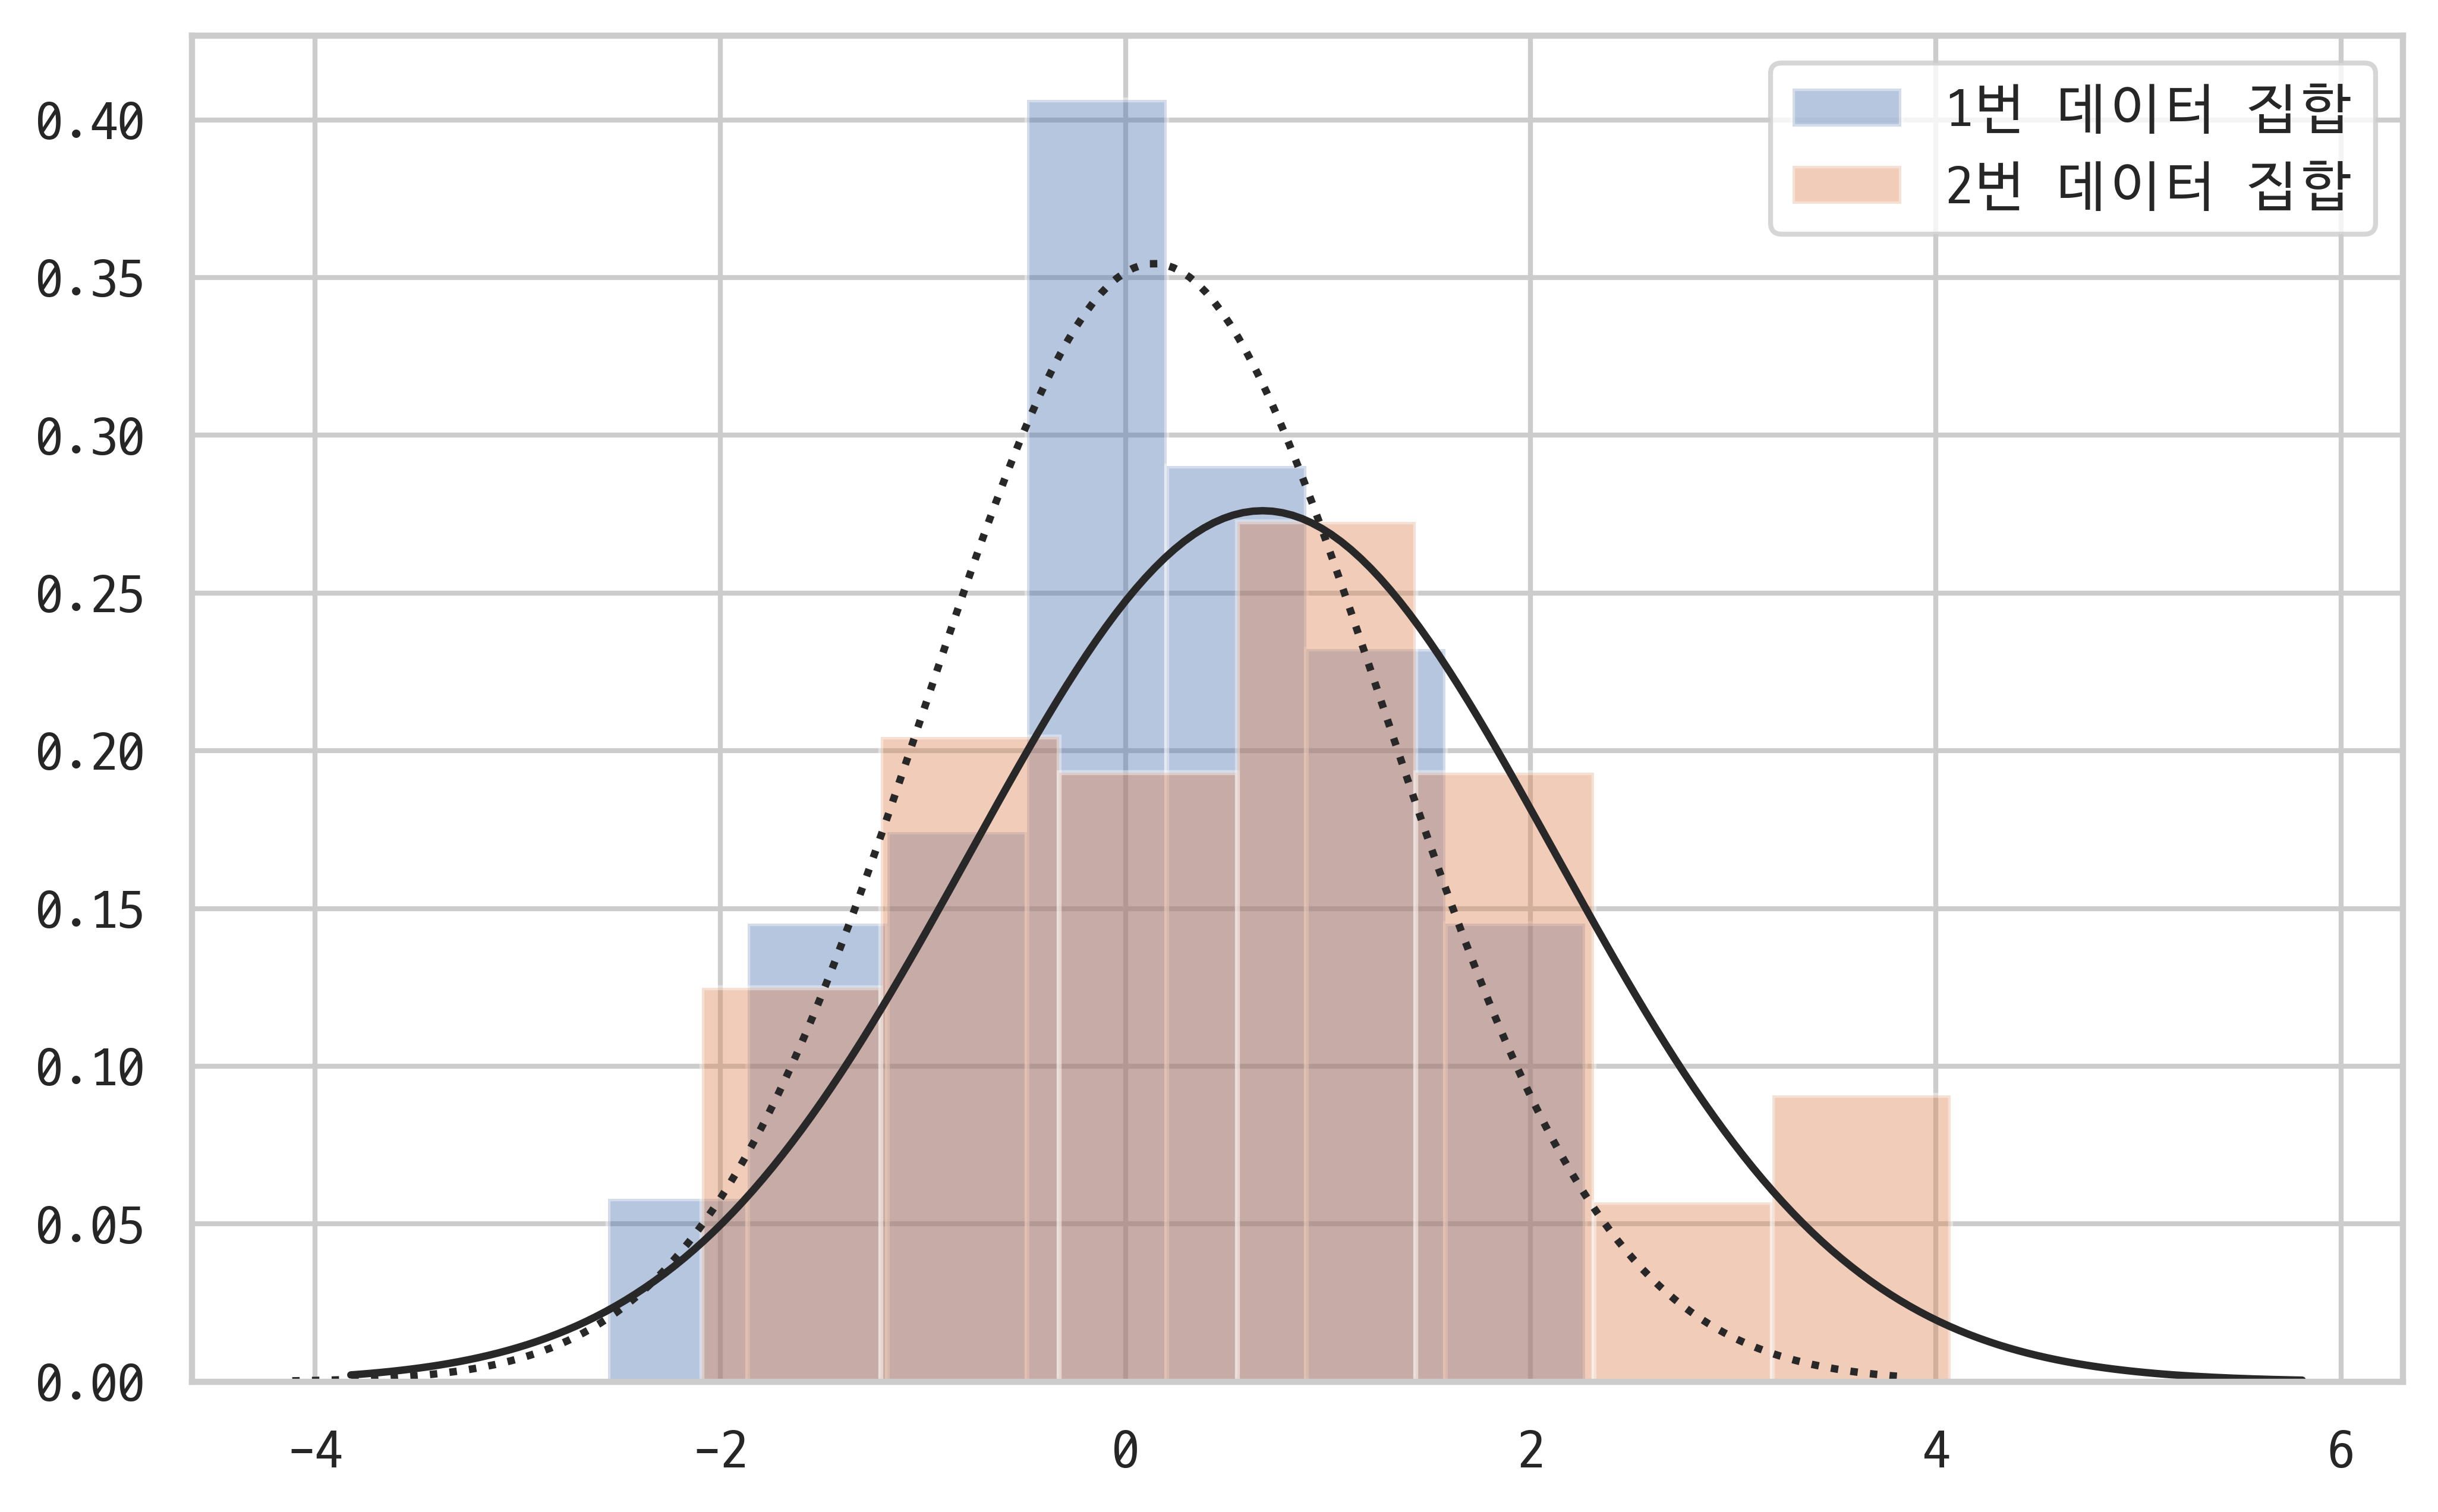

In [28]:
np.random.seed(0)
N1 = 50
N2 = 100
x1 = sp.stats.norm(0, 1).rvs(N1)
x2 = sp.stats.norm(0.5, 1.5).rvs(N2)
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

In [30]:
sp.stats.ks_2samp(x1, x2)

Ks_2sampResult(statistic=0.23, pvalue=0.055507233643215415)